# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
web_info = soup.get_text()
print(web_info)





Mars Temperature Data








Mission To Mars




Mars Temperature Data
This is Mars data.


id
terrestrial_date
sol
ls
month
min_temp
pressure


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_data = []

rows = soup.find_all("tr", class_="data-row")
for row in rows:
    td = row.find_all('td')
    id_ = row.find("th") 
    row = [col.text for col in td]
    mars_data.append(row)


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
dataframe = pd.DataFrame(mars_data, columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure" ])


In [8]:
# Confirm DataFrame was created successfully
dataframe

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(dataframe.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
dataframe['terrestrial_date'] = pd.to_datetime(dataframe['terrestrial_date'], errors='coerce')
dataframe['sol'] = pd.to_numeric(dataframe['sol'], errors='coerce', downcast="integer")
dataframe['ls'] = pd.to_numeric(dataframe['ls'], errors='coerce', downcast="integer")
dataframe['month'] = pd.to_numeric(dataframe['month'], errors='coerce', downcast="integer")
dataframe['min_temp'] = pd.to_numeric(dataframe['min_temp'], errors='coerce')
dataframe['pressure'] = pd.to_numeric(dataframe['pressure'], errors='coerce')



In [11]:
# Confirm type changes were successful by examining data types again
print(dataframe.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int16
ls                           int16
month                         int8
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
num_months = dataframe['month'].nunique()
num_months

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = dataframe['sol'].nunique()
num_sols

1867

In [14]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = dataframe.groupby('month')['min_temp'].mean()
avg_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

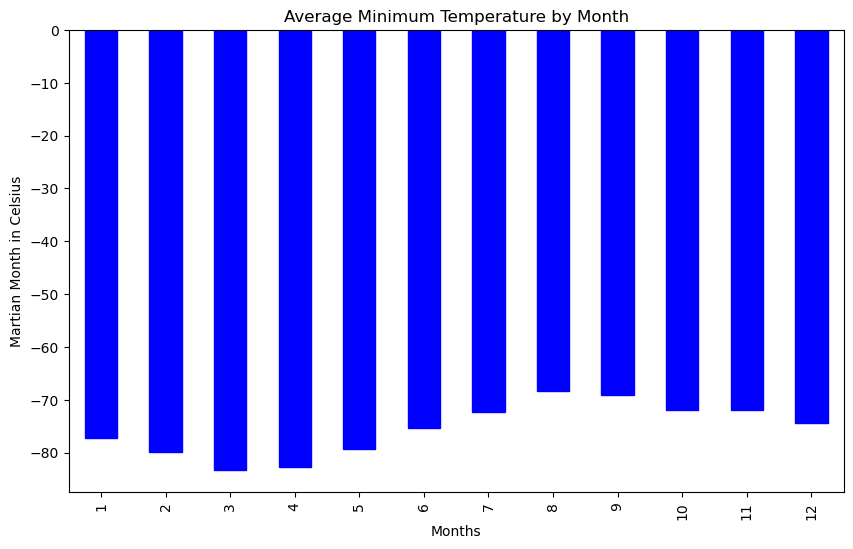

In [15]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='blue', edgecolor='blue')
plt.xlabel('Months')
plt.ylabel('Martian Month in Celsius')
plt.title('Average Minimum Temperature by Month') 
plt.show()

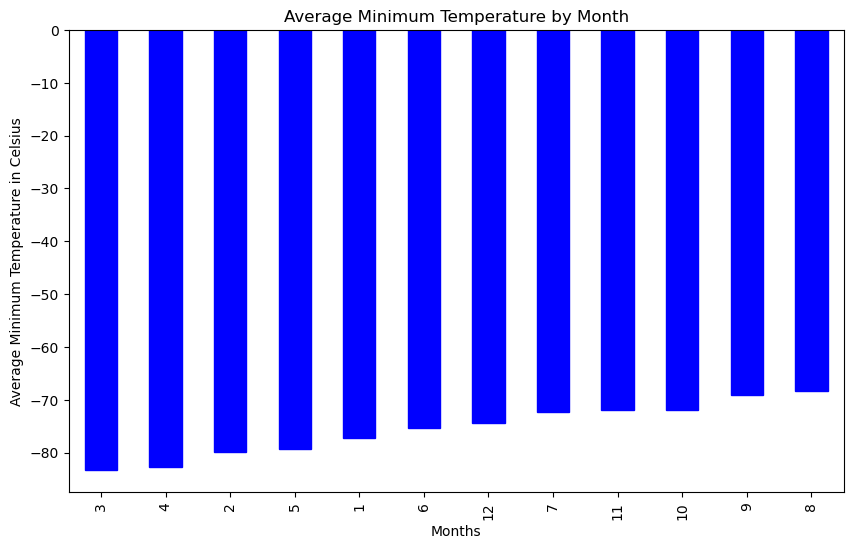

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp_by_month = dataframe.groupby('month')['min_temp'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='blue', edgecolor='blue')
plt.xlabel('Months')
plt.ylabel('Average Minimum Temperature in Celsius')
plt.title('Average Minimum Temperature by Month')
plt.show()

In [17]:
# 4. What is the average pressure by month?
avg_pressure_by_month = dataframe.groupby('month')['pressure'].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

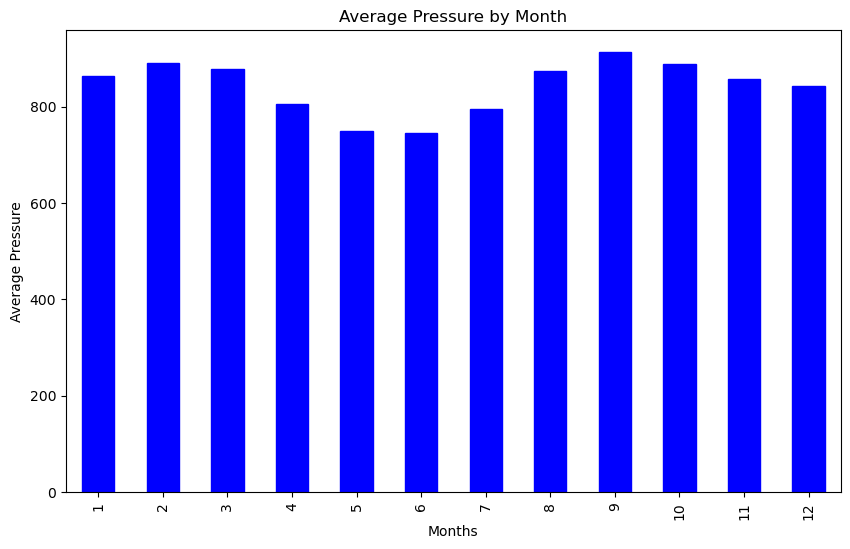

In [18]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='blue', edgecolor='blue')
plt.xlabel('Months')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month')
plt.show()

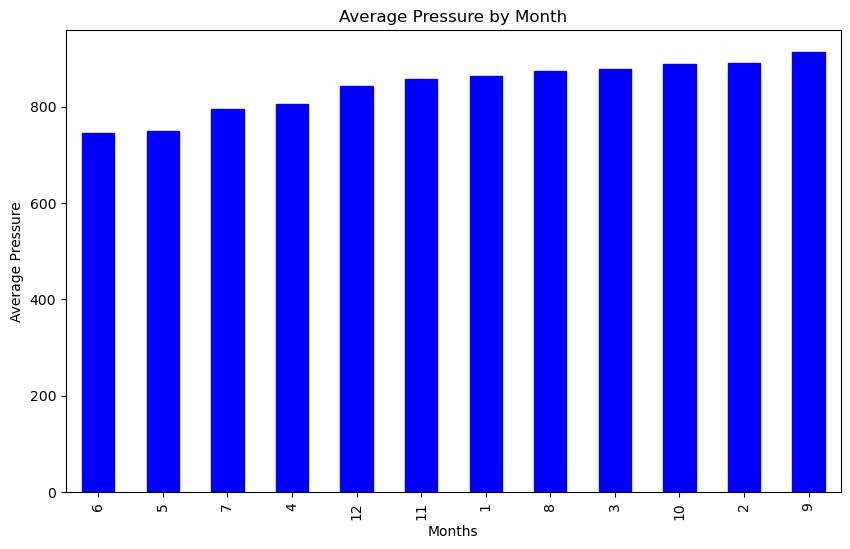

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_by_month = dataframe.groupby('month')['pressure'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='blue', edgecolor='blue')
plt.xlabel('Months')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month')
plt.show()

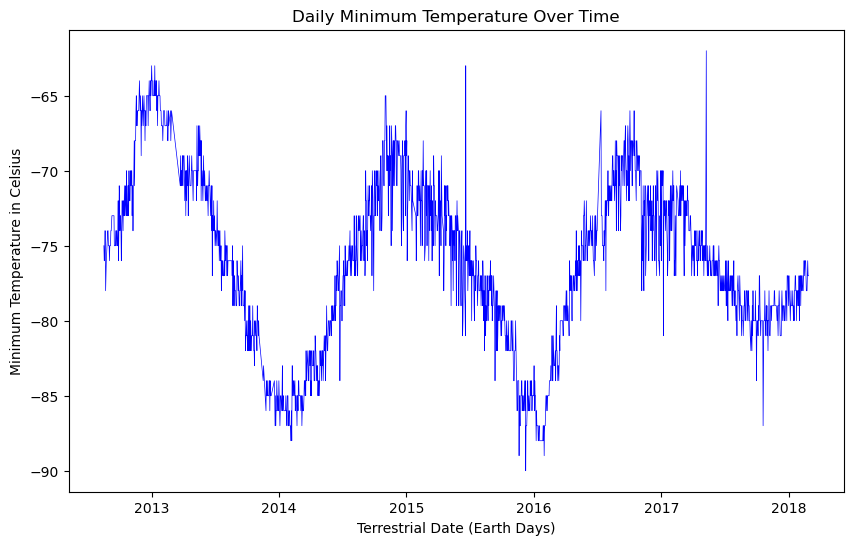

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
dataframe['terrestrial_date'] = pd.to_datetime(dataframe['terrestrial_date'])
plt.figure(figsize=(10, 6))
plt.plot(dataframe['terrestrial_date'], dataframe['min_temp'], color='blue', linewidth=0.5)
plt.xlabel('Terrestrial Date (Earth Days)')
plt.ylabel('Minimum Temperature in Celsius')
plt.title('Daily Minimum Temperature Over Time')
plt.show()

#### Minimum Temperature

 Observing the Daily Minimum Temperature Over Time graph, there is a cycle of 2 years (Terrestrial Date) where the minimum daily temperature increases during one year and then decreases the following year, and then starts a new cycle.  

#### Atmospheric Pressure

Looking at the Atmospheric Pressure graph, we can observe no significant change during a twelve-month period. Comparing it to the twelve-month average temperature graph, there is no direct relationship between temperature changes and atmospheric pressure changes.

#### Year Length

According to the data, Mars has 12 months. The planet's average minimum temperatures can reach less than -80 degrees Celsius. Looking at the bar chart, the coldest months correspond to what is shown as months 3 and 4. Later, the average temperature during months 8 and 9 increases to -70 degrees Celsius. As we can see, the change in average minimum temperatures during 12 months is not significant.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
filename = 'mars_data.csv'
dataframe.to_csv(filename, index=False)

In [22]:
browser.quit()